In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split #split data into train, test data
from sklearn.preprocessing import StandardScaler #standardize data

In [4]:
#model creation
from tensorflow.keras.models import Sequential #class used to create model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout #layers nedded #2d-as we are working on 2 dimensional data
from tensorflow.keras.optimizers import Adam #optimizer

#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [5]:
#import dataset
from tensorflow.keras.datasets import mnist

In [6]:
#Load Data (tuple format)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
#Split data into train, valid set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
#Scaling data between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [13]:
#Hyperparameters
learning_rate = 0.00005
batch_size = 32
epochs = 10

In [14]:
#Create CNN Model
model = Sequential([
    Conv2D(128, (3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ])

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Display the Model Architecture
model.build((None, 28,28,1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,771,594 (10.57 MB)

 Trainable params: 2,771,594 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Train
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epochs, batch_size=batch_size)

#will record history of every model in the variable

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.8125 - loss: 0.7896 - val_accuracy: 0.9421 - val_loss: 0.2063
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 134s 70ms/step - accuracy: 0.9464 - loss: 0.1859 - val_accuracy: 0.9594 - val_loss: 0.1446
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 102s 68ms/step - accuracy: 0.9646 - loss: 0.1282 - val_accuracy: 0.9711 - val_loss: 0.1086
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 68ms/step - accuracy: 0.9721 - loss: 0.1001 - val_accuracy: 0.9728 - val_loss: 0.0908
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 67ms/step - accuracy: 0.9797 - loss: 0.0747 - val_accuracy: 0.9751 - val_loss: 0.0849
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 147s 70ms/step - accuracy: 0.9813 - loss: 0.0675 - val_accuracy: 0.9782 - val_loss: 0.0744
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 137s 67ms/step - accuracy: 0.9845 - loss: 0.0575 - val_accuracy: 0.9793 - val_loss: 0.0692
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 67ms/step - accuracy: 

In [19]:
#Evauation Function
def evaluate(model, X_test, y_test, task_type='classification'):
  predictions = model.predict(X_test)
  if task_type == 'classification':
    y_pred = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {prec}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)

evaluate(model, X_test, y_test, 'classification')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
Accuracy: 0.9823
Precision: 0.9823393441492917
Recall: 0.9823
F1 Score: 0.9822952728133758
Confusion Matrix:
[[ 975    0    1    0    0    0    1    1    2    0]
 [   0 1125    5    0    0    0    2    0    3    0]
 [   1    3 1014    1    1    0    1    7    4    0]
 [   0    0    1  998    0    5    0    1    5    0]
 [   1    0    1    0  963    0    3    1    3   10]
 [   2    0    0    7    0  879    3    0    1    0]
 [   8    3    1    1    1    4  937    0    3    0]
 [   0    5   11    2    1    0    0  999    4    6]
 [   6    0    6    1    0    1    0    2  955    3]
 [   4    3    1    4    5    3    0    7    4  978]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99 

In [17]:
#Plot loss and accuracy
def plot_training(history, title, task_type='classification'):
  plt.figure(figsize=(12,8))

  #Plot loss
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(f'{title} - Loss')
  plt.legend()

  #Plot Accuarcy
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label='Training accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title(f'{title} - Loss')
  plt.legend()

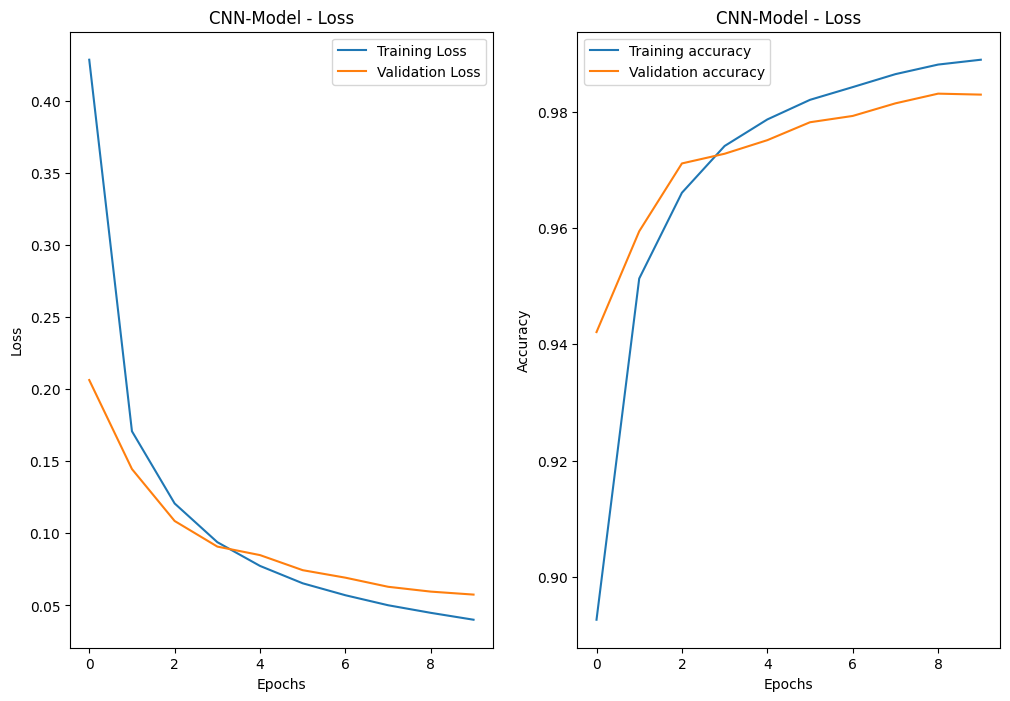

In [18]:
plot_training(history, "CNN-Model", "classification")